# Modeling and Evaluation with scikit-learn

# Part 3: Metrics for evaluating the trained models

In Parts 1 and 2, we tried several supervised learning models and measured their performance using **accuracy** of the predictions over the test dataset. Accuracy is a frequently used performance metric in practice, yet not the only one. In fact, sometimes it is better to use other alternative metrics. In this part of the lecture, we discuss several other metrics.

We'll switch to the KDD98 dataset for this part as it is about a business story, where it's easier for us to associate the predictions/decisions to financial consequences.

## Prepare the KDD98 dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('KDD98_preprocessed.csv')
df.head()

,TargetB,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S
0,0,0,NaN,0.0,0,0,NaN,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,0,0,0,0,0,0
1,0,23,67.0,0.0,0,186800,NaN,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,0,0,0,0,0,0
2,1,0,NaN,1.0,0,87600,38750.0,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,1,0,0,0,0,1
3,1,0,NaN,1.0,0,139200,38942.0,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,1,1,0,0,0,0
4,0,35,53.0,1.0,0,168100,71509.0,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,0,0,1,0,0,0


In [3]:
X = df.drop(columns=['TargetB'])
y = df['TargetB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=365)
X_train = X_train.copy()
X_test = X_test.copy()
print(X_train.shape)
print(X_test.shape)

(7748, 29)
(1938, 29)


This dataset has missing values in:
+ categorical column DemGender
+ numerical columns DemAge, DemMedIncome, GiftAvgCard36

We next impute the missing values.

In [4]:
# Calculate the values we plan to use

cat_columns = ['DemGender']
cat_columns_modes = X_train.mode().iloc[0][cat_columns]
# Need ".loc[0]" above because a column may have multiple modes

num_columns = ['DemAge', 'DemMedIncome', 'GiftAvgCard36']
num_columns_means = X_train.mean()[num_columns]

In [5]:
# Impute
X_train[cat_columns] = X_train[cat_columns].fillna(cat_columns_modes)
X_train[num_columns] = X_train[num_columns].fillna(num_columns_means)

In [6]:
# And never forget to do the same to the test dataset
X_test[cat_columns] = X_test[cat_columns].fillna(cat_columns_modes)
X_test[num_columns] = X_test[num_columns].fillna(num_columns_means)

## Prepare a few trained models

In [7]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', max_iter=1000)
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {accuracy:.2%}")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
clf_lr = clf
accuracy_lr = accuracy
cm_lr = cm

The accuracy is: 56.55%
The confusion matrix is:
[[530 439]
 [403 566]]


In [8]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {accuracy:.2%}")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
clf_dt = clf
accuracy_dt = accuracy
cm_dt = cm

The accuracy is: 55.99%
The confusion matrix is:
[[526 443]
 [410 559]]


In [9]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
# clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight={0:1, 1:1.05})
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {accuracy:.2%}")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
clf_rf = clf
accuracy_rf = accuracy
cm_rf = cm

The accuracy is: 58.88%
The confusion matrix is:
[[607 362]
 [435 534]]


In [ ]:
#first column: predicted not donate, second column: predicted donate
#first row: actually not donate, second row: actually donate

Now we are ready to discuss the various metrics for evaluating the trained models. We start with the familiar **accuracy** metric.

## Metric: accuracy

$$accuracy = \frac{\textrm{number of correct predictions}}{\textrm{total number of records}}$$

~In above, the logistic regression model results in an accuracy of 84.39%, while the decision tree model results in an accuracy of 73.75%.~ So, if we use accuracy as the metric, the logistic regression model is the champion. Two caveats:
+ You might get slightly different accuracy numbers than the above due to randomness
+ The above discussion totally (and wrongfully) ignored hyperparameter tuning

However, a close look at the confusion matrices as shown next, reveals that accuracy as metric is problematic here.

## Confusion matrix

y_predict==0We get the **confusion matrix** by comparing the ground truth, "y_test", with the predicted value, "y_predict":
<table>
  <tr>
    <th></th>
    <th>y_predict==0</th>
    <th>y_predict==1</th>
  </tr>
  <tr>
    <th>y_test==0</th>
    <th>number of TN (true negatives)</th>
    <th>number of FP (false positives)</th>
  </tr>
  <tr>
    <th>y_test==1</th>
    <th>number of FN (false negatives)</th>
    <th>number of TP (true positives)</th>
  </tr>
</table>

Under this binary prediction context, our trained model can make two types of prediction mistakes:
+ False positives. In this KDD98 case, the number of people the model predicted to donate but actually did not donate.
+ False negatives. In this KDD98 case, the number of people the model predicted not to donate but actually donated.

*Question: Which of these two types of mistakes is more costly for the non-profit behind this solicitation campaign?*

...

## Metrics: precision and recall

To tell apart the two types of mistakes, we have these two metrics:

$$precision = \frac{\textrm{true positives}}{\textrm{true positives + false positives}}$$

In this KDD98 case, precision means: how precise are your predicted donations? In other words, among all the people whom you predicted would donate, how many actually donated?

$$recall = \frac{\textrm{true positives}}{\textrm{true positives + false negatives}}$$

In this KDD98 case, recall means: among all the people who actually donated, how many did your model catch/recall?

*Question: Which of these two metrics is more important for a the nonprofit?*

...

In [10]:
# Let's calculate these metrics for the two trained models.

print(f"For the logistic regression with {accuracy_lr:.2%} accuracy:")
print(f"The precision is {cm_lr[1,1]/sum(cm_lr[:,1]):.2%}.")
print(f"The recall is {cm_lr[1,1]/sum(cm_lr[1,:]):.2%}.")

print(f"\nFor the decision tree with {accuracy_dt:.2%} accuracy:")
print(f"The precision is {cm_dt[1,1]/sum(cm_dt[:,1]):.2%}.")
print(f"The recall is {cm_dt[1,1]/sum(cm_dt[1,:]):.2%}.")

print(f"\nFor the random forest with {accuracy_rf:.2%} accuracy:")
print(f"The precision is {cm_rf[1,1]/sum(cm_rf[:,1]):.2%}.")
print(f"The recall is {cm_rf[1,1]/sum(cm_rf[1,:]):.2%}.")

# Alternatively, we can also use sklearn.metrics.precision_score() and sklearn.metrics.recall_score

For the logistic regression with 56.55% accuracy:
The precision is 56.32%.
The recall is 58.41%.

For the decision tree with 55.99% accuracy:
The precision is 55.79%.
The recall is 57.69%.

For the random forest with 58.88% accuracy:
The precision is 59.60%.
The recall is 55.11%.


***In practice, precision and recall can often be conflicting objectives.*** In the KDD98 case, for example, one way to improve recall is to flag more people as predicted donors. Think about the extreme: if we predict all people are donors, we would be able to catch all true donors and thus achieve perfect recall! However, this strategy also means that we are mistakenly labeling more people as donors who actually would not donate, a.k.a., the precision is going down.

How a trained model should balance between precision and recall is a core issue in the study of performance metrics. The metric below is one example that tries to balance these two.

## Metric: F1 score -- trying to balance between precision and recall

**F1 score** is a weighted average of the precision and recall. The idea is to punish predictions that do not balance between precision and recall.

$$f1 = \frac{2 * precision * recall}{precision + recall}$$

In [11]:
from sklearn.metrics import f1_score

y_predict_lr = clf_lr.predict(X_test)
print(f"The F1 score of the logistic regression model is {f1_score(y_test, y_predict_lr)}")

y_predict_dt = clf_dt.predict(X_test)
print(f"The F1 score of the decisioin tree model is {f1_score(y_test, y_predict_dt)}")

y_predict_rf = clf_rf.predict(X_test)
print(f"The F1 score of the random forest model is {f1_score(y_test, y_predict_rf)}")

The F1 score of the logistic regression model is 0.5734549138804458
The F1 score of the decisioin tree model is 0.5672247590055809
The F1 score of the random forest model is 0.5726541554959786


The logistic regression model got a slightly larger F1 score than the random forest model. This is because the former got roughly balanced precision and recall values for this dataset.

So, if we care not only about how many mistakes our model is making, ***but also whether these mistakes are balanced across the two types (false positives and false negatives)***, F1 score can be a better performance metric than accuracy.

## Value prediction versus probability prediction

All metrics we discussed so far are built on the ***target value/label predictions from `clf.predict()`***. In the LendingClub case, for example, the output of `clf.predict()` for each record in X_test is one of two possible values: 0 (predicted not to default) and 1 (predicted to default).

In addition to the value predictions, a trained model in scikit-learn also produces ***probability estimates via `clf.predict_proba()`***. Let's use the random forest as an example. 

In [12]:
# Value/label prediction
y_predict = clf_rf.predict(X_test)

# Probability estimation
y_predict_proba = clf_rf.predict_proba(X_test)

# Put them into a DataFrame for ease of comparison
record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba_1':y_predict_proba[:,1]})
record_level_predictions

,y_test,y_predict,y_predict_proba_1
0,1,1,0.548155
1,0,0,0.352036
2,0,1,0.586016
3,0,0,0.474773
4,0,1,0.660895
...,...,...,...
1933,0,0,0.494971
1934,1,0,0.464156
1935,0,0,0.417309
1936,0,1,0.610241


As shown above, RandomForestClassifier produces record-by-record binary predictions via its `predict()` method, as shown in the "y_predict" column above. It also produces record-by-record probability estimates via its `predict_proba()` method, as shown in the "y_predict_proba" column above.
+ For example, for the first record, clf_rf predicts that the target value should be 1, and it estimates that the probability of the target being 1 is 0.548155
    + By default, if y_predict_proba_1<0.5, y_predict is set to 0; if y_predict_proba_1>0.5, y_predict is set to 1
        + Do you agree with this default threshold value of 0.5?
    
The probability estimates are useful in ranking the predictions:

In [13]:
record_level_predictions.sort_values(by='y_predict_proba_1', ascending=False)

,y_test,y_predict,y_predict_proba_1
1889,1,1,0.768516
1520,1,1,0.754665
1555,1,1,0.751297
1624,1,1,0.739171
1124,0,1,0.738744
...,...,...,...
676,1,0,0.328067
776,0,0,0.327360
1712,1,0,0.324378
1853,1,0,0.321463


*Question: If you are in charge of the solicitation campaign? Which potential donor would you reach out first? Second? ...*

...

## The ROC curve

When reaching out to potential donors, the logical sequence is to reach out to the one with the highest probability of donation first. Then, the one with the 2nd highest probability of donation second. And so on. 
Suppose that we ask the following two questions after adding *each* new potential donor:
+ What is the **true positive rate** now?
+ What is the **false positive rate** now?

The result is the receiver operating characteristic curve, or [**ROC curve**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Below we plot the ROC curves for the three trained models.

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

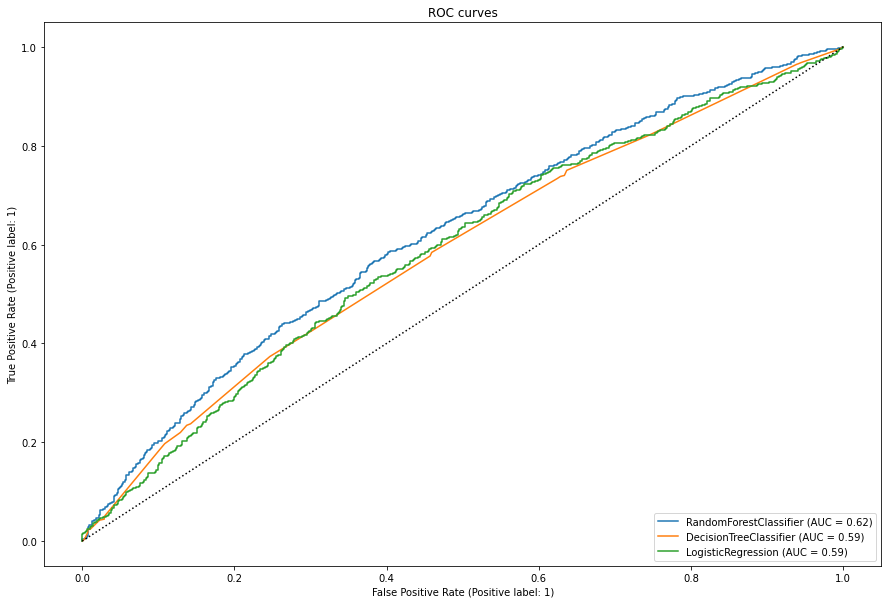

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_roc_curve(clf_rf, X_test, y_test, ax=ax)
plot_roc_curve(clf_dt, X_test, y_test, ax=ax)
plot_roc_curve(clf_lr, X_test, y_test, ax=ax)
ax.plot([0,1],[0,1], 'k:')
plt.title('ROC curves')
plt.show()

## Metric: AUC

"AUC" refers to the size of the "area under the ROC curve." 

It can be derived using `roc_auc_score(y_test, y_predict_proba[:,1])`. This value is always between 0.5 and 1. A larger number means a better model performance. Let's calculate AUC for the trained random forest:

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1])

0.6194676882213425

Unlike the metrics before, AUC explicitly takes into consideration ***the strength of every prediction*** in terms of the probability estimates. 